## 07 문서 군집화

### Opinion Review 데이터 세트를 이용한 문서 군집화 수행하기

In [9]:
import pandas as pd
import glob ,os

# 아래는 제 컴퓨터에서 압축 파일을 풀어 놓은 디렉토리이니, 여러분의 디렉토리를 설정해 주십시요  
path = r'C:\Users\lovel\Documents\Euron\2022-1-Euron-Study-Assignments\Week_13\OpinosisDataset1.0\topics'                     
# path로 지정한 디렉토리 밑에 있는 모든 .data 파일들의 파일명을 리스트로 취합
all_files = glob.glob(os.path.join(path, "*.data"))    
filename_list = []
opinion_text = []

# 개별 파일들의 파일명은 filename_list 리스트로 취합, 
# 개별 파일들의 파일내용은 DataFrame로딩 후 다시 string으로 변환하여 opinion_text 리스트로 취합 
for file_ in all_files:
    # 개별 파일을 읽어서 DataFrame으로 생성 
    df = pd.read_table(file_,index_col=None, header=0,encoding='latin1')
    
    # 절대경로로 주어진 file 명을 가공. 만일 Linux에서 수행시에는 아래 \\를 / 변경. 맨 마지막 .data 확장자도 제거
    filename_ = file_.split('\\')[-1]
    filename = filename_.split('.')[0]

    #파일명 리스트와 파일내용 리스트에 파일명과 파일 내용을 추가. 
    filename_list.append(filename)
    opinion_text.append(df.to_string())

# 파일명 리스트와 파일내용 리스트를  DataFrame으로 생성
document_df = pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})
document_df.head()

filename  \
0   accuracy_garmin_nuvi_255W_gps   
1  bathroom_bestwestern_hotel_sfo   
2      battery-life_amazon_kindle   
3      battery-life_ipod_nano_8gb   
4     battery-life_netbook_1005ha   

                                        opinion_text  
0                                                ...  
1                                                ...  
2                                                ...  
3                                                ...  
4                                                ...

In [10]:
from nltk.stem import WordNetLemmatizer
import nltk
import string

remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
lemmar = WordNetLemmatizer()

def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english' , \
                             ngram_range=(1,2), min_df=0.05, max_df=0.85 )

#opinion_text 컬럼값으로 feature vectorization 수행
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

C:\Users\lovel\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [12]:
from sklearn.cluster import KMeans

# 5개 집합으로 군집화 수행. 예제를 위해 동일한 클러스터링 결과 도출용 random_state=0 
km_cluster = KMeans(n_clusters=5, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_

In [13]:
document_df['cluster_label'] = cluster_label
document_df.head()

filename  \
0   accuracy_garmin_nuvi_255W_gps   
1  bathroom_bestwestern_hotel_sfo   
2      battery-life_amazon_kindle   
3      battery-life_ipod_nano_8gb   
4     battery-life_netbook_1005ha   

                                        opinion_text  cluster_label  
0                                                ...              0  
1                                                ...              1  
2                                                ...              3  
3                                                ...              3  
4                                                ...              3

In [14]:
document_df[document_df['cluster_label']==0].sort_values(by='filename')

filename  \
0     accuracy_garmin_nuvi_255W_gps   
8   directions_garmin_nuvi_255W_gps   
9      display_garmin_nuvi_255W_gps   
33   satellite_garmin_nuvi_255W_gps   
34      screen_garmin_nuvi_255W_gps   
43       speed_garmin_nuvi_255W_gps   
47   transmission_toyota_camry_2007   
48     updates_garmin_nuvi_255W_gps   

                                         opinion_text  cluster_label  
0                                                 ...              0  
8                                                 ...              0  
9                                                 ...              0  
33                                                ...              0  
34                                                ...              0  
43                                                ...              0  
47                                                ...              0  
48                                                ...              0

In [15]:
document_df[document_df['cluster_label']==1].sort_values(by='filename')

filename  \
1    bathroom_bestwestern_hotel_sfo   
13          food_holiday_inn_london   
14           food_swissotel_chicago   
15       free_bestwestern_hotel_sfo   
20   location_bestwestern_hotel_sfo   
21      location_holiday_inn_london   
24    parking_bestwestern_hotel_sfo   
28         price_holiday_inn_london   
32          room_holiday_inn_london   
30      rooms_bestwestern_hotel_sfo   
31          rooms_swissotel_chicago   
38    service_bestwestern_hotel_sfo   
39       service_holiday_inn_london   
40  service_swissotel_hotel_chicago   
45      staff_bestwestern_hotel_sfo   
46          staff_swissotel_chicago   

                                         opinion_text  cluster_label  
1                                                 ...              1  
13                                                ...              1  
14                                                ...              1  
15                                                ...              1  
20                                                ...              1  
21                                                ...              1  
24                                                ...              1  
28                                                ...              1  
32                                                ...              1  
30                                                ...              1  
31                                                ...              1  
38                                                ...              1  
39                                                ...              1  
40                                                ...              1  
45                                                ...              1  
46                                                ...              1

In [16]:
document_df[document_df['cluster_label']==2].sort_values(by='filename')

filename  \
6       comfort_honda_accord_2008   
7       comfort_toyota_camry_2007   
16  gas_mileage_toyota_camry_2007   
17     interior_honda_accord_2008   
18     interior_toyota_camry_2007   
22      mileage_honda_accord_2008   
25  performance_honda_accord_2008   
29      quality_toyota_camry_2007   
37        seats_honda_accord_2008   

                                         opinion_text  cluster_label  
6                                                 ...              2  
7                                                 ...              2  
16                                                ...              2  
17                                                ...              2  
18                                                ...              2  
22                                                ...              2  
25                                                ...              2  
29                                                ...              2  
37                                                ...              2

In [17]:
document_df[document_df['cluster_label']==3].sort_values(by='filename')

filename  \
2    battery-life_amazon_kindle   
3    battery-life_ipod_nano_8gb   
4   battery-life_netbook_1005ha   
26   performance_netbook_1005ha   
42          sound_ipod_nano_8gb   
49          video_ipod_nano_8gb   

                                         opinion_text  cluster_label  
2                                                 ...              3  
3                                                 ...              3  
4                                                 ...              3  
26                                                ...              3  
42      headphone jack i got a clear case for it a...              3  
49                                                ...              3

In [18]:
document_df[document_df['cluster_label']==4].sort_values(by='filename')

filename  \
5           buttons_amazon_kindle   
10  eyesight-issues_amazon_kindle   
11              features_windows7   
12            fonts_amazon_kindle   
19        keyboard_netbook_1005ha   
23       navigation_amazon_kindle   
27            price_amazon_kindle   
35           screen_ipod_nano_8gb   
36          screen_netbook_1005ha   
41       size_asus_netbook_1005ha   
44                 speed_windows7   
50     voice_garmin_nuvi_255W_gps   

                                         opinion_text  cluster_label  
5                                                 ...              4  
10                                                ...              4  
11                                                ...              4  
12                                                ...              4  
19                                                ...              4  
23                                                ...              4  
27                                                ...              4  
35                                                ...              4  
36                                                ...              4  
41                                                ...              4  
44                                                ...              4  
50                                                ...              4

In [19]:
from sklearn.cluster import KMeans

# 3개의 집합으로 군집화 
km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_


# 소속 클러스터를 cluster_label 컬럼으로 할당하고 cluster_label 값으로 정렬
document_df['cluster_label'] = cluster_label
document_df.sort_values(by='cluster_label')

filename  \
0     accuracy_garmin_nuvi_255W_gps   
48     updates_garmin_nuvi_255W_gps   
44                   speed_windows7   
43       speed_garmin_nuvi_255W_gps   
42              sound_ipod_nano_8gb   
41         size_asus_netbook_1005ha   
36            screen_netbook_1005ha   
35             screen_ipod_nano_8gb   
34      screen_garmin_nuvi_255W_gps   
33   satellite_garmin_nuvi_255W_gps   
27              price_amazon_kindle   
26       performance_netbook_1005ha   
49              video_ipod_nano_8gb   
23         navigation_amazon_kindle   
19          keyboard_netbook_1005ha   
50       voice_garmin_nuvi_255W_gps   
9      display_garmin_nuvi_255W_gps   
4       battery-life_netbook_1005ha   
3        battery-life_ipod_nano_8gb   
2        battery-life_amazon_kindle   
8   directions_garmin_nuvi_255W_gps   
10    eyesight-issues_amazon_kindle   
11                features_windows7   
12              fonts_amazon_kindle   
5             buttons_amazon_kindle   
13          food_holiday_inn_london   
39       service_holiday_inn_london   
38    service_bestwestern_hotel_sfo   
1    bathroom_bestwestern_hotel_sfo   
14           food_swissotel_chicago   
20   location_bestwestern_hotel_sfo   
24    parking_bestwestern_hotel_sfo   
15       free_bestwestern_hotel_sfo   
31          rooms_swissotel_chicago   
30      rooms_bestwestern_hotel_sfo   
45      staff_bestwestern_hotel_sfo   
40  service_swissotel_hotel_chicago   
21      location_holiday_inn_london   
46          staff_swissotel_chicago   
32          room_holiday_inn_london   
28         price_holiday_inn_london   
47   transmission_toyota_camry_2007   
16    gas_mileage_toyota_camry_2007   
6         comfort_honda_accord_2008   
7         comfort_toyota_camry_2007   
29        quality_toyota_camry_2007   
22        mileage_honda_accord_2008   
18       interior_toyota_camry_2007   
17       interior_honda_accord_2008   
37          seats_honda_accord_2008   
25    performance_honda_accord_2008   

                                         opinion_text  cluster_label  
0                                                 ...              0  
48                                                ...              0  
44                                                ...              0  
43                                                ...              0  
42      headphone jack i got a clear case for it a...              0  
41                                                ...              0  
36                                                ...              0  
35                                                ...              0  
34                                                ...              0  
33                                                ...              0  
27                                                ...              0  
26                                                ...              0  
49                                                ...              0  
23                                                ...              0  
19                                                ...              0  
50                                                ...              0  
9                                                 ...              0  
4                                                 ...              0  
3                                                 ...              0  
2                                                 ...              0  
8                                                 ...              0  
10                                                ...              0  
11                                                ...              0  
12                                                ...              0  
5                                                 ...              0  
13                                                ...              1  
39                                                ...              1  
38        

### 군집별 핵심 단어 추출하기

In [20]:
cluster_centers = km_cluster.cluster_centers_
print('cluster_centers shape :',cluster_centers.shape)
print(cluster_centers)

cluster_centers shape : (3, 4611)
[[0.01005322 0.         0.         ... 0.00706287 0.         0.        ]
 [0.         0.00099499 0.00174637 ... 0.         0.00183397 0.00144581]
 [0.         0.00092551 0.         ... 0.         0.         0.        ]]


In [21]:
# 군집별 top n 핵심단어, 그 단어의 중심 위치 상대값, 대상 파일명들을 반환함. 
def get_cluster_details(cluster_model, cluster_data, feature_names, clusters_num, top_n_features=10):
    cluster_details = {}
    
    # cluster_centers array 의 값이 큰 순으로 정렬된 index 값을 반환
    # 군집 중심점(centroid)별 할당된 word 피처들의 거리값이 큰 순으로 값을 구하기 위함.  
    centroid_feature_ordered_ind = cluster_model.cluster_centers_.argsort()[:,::-1]
    
    #개별 군집별로 iteration하면서 핵심단어, 그 단어의 중심 위치 상대값, 대상 파일명 입력
    for cluster_num in range(clusters_num):
        # 개별 군집별 정보를 담을 데이터 초기화. 
        cluster_details[cluster_num] = {}
        cluster_details[cluster_num]['cluster'] = cluster_num
        
        # cluster_centers_.argsort()[:,::-1] 로 구한 index 를 이용하여 top n 피처 단어를 구함. 
        top_feature_indexes = centroid_feature_ordered_ind[cluster_num, :top_n_features]
        top_features = [ feature_names[ind] for ind in top_feature_indexes ]
        
        # top_feature_indexes를 이용해 해당 피처 단어의 중심 위치 상댓값 구함 
        top_feature_values = cluster_model.cluster_centers_[cluster_num, top_feature_indexes].tolist()
        
        # cluster_details 딕셔너리 객체에 개별 군집별 핵심 단어와 중심위치 상대값, 그리고 해당 파일명 입력
        cluster_details[cluster_num]['top_features'] = top_features
        cluster_details[cluster_num]['top_features_value'] = top_feature_values
        filenames = cluster_data[cluster_data['cluster_label'] == cluster_num]['filename']
        filenames = filenames.values.tolist()
        cluster_details[cluster_num]['filenames'] = filenames
        
    return cluster_details

In [22]:
def print_cluster_details(cluster_details):
    for cluster_num, cluster_detail in cluster_details.items():
        print('####### Cluster {0}'.format(cluster_num))
        print('Top features:', cluster_detail['top_features'])
        print('Reviews 파일명 :',cluster_detail['filenames'][:7])
        print('==================================================')

In [23]:
feature_names = tfidf_vect.get_feature_names()

cluster_details = get_cluster_details(cluster_model=km_cluster, cluster_data=document_df,\
                                  feature_names=feature_names, clusters_num=3, top_n_features=10 )
print_cluster_details(cluster_details)

####### Cluster 0
Top features: ['screen', 'battery', 'keyboard', 'battery life', 'life', 'kindle', 'direction', 'video', 'size', 'voice']
Reviews 파일명 : ['accuracy_garmin_nuvi_255W_gps', 'battery-life_amazon_kindle', 'battery-life_ipod_nano_8gb', 'battery-life_netbook_1005ha', 'buttons_amazon_kindle', 'directions_garmin_nuvi_255W_gps', 'display_garmin_nuvi_255W_gps']
####### Cluster 1
Top features: ['room', 'hotel', 'service', 'staff', 'food', 'location', 'bathroom', 'clean', 'price', 'parking']
Reviews 파일명 : ['bathroom_bestwestern_hotel_sfo', 'food_holiday_inn_london', 'food_swissotel_chicago', 'free_bestwestern_hotel_sfo', 'location_bestwestern_hotel_sfo', 'location_holiday_inn_london', 'parking_bestwestern_hotel_sfo']
####### Cluster 2
Top features: ['interior', 'seat', 'mileage', 'comfortable', 'gas', 'gas mileage', 'transmission', 'car', 'performance', 'quality']
Reviews 파일명 : ['comfort_honda_accord_2008', 'comfort_toyota_camry_2007', 'gas_mileage_toyota_camry_2007', 'interior_hon

## 08 문서 유사도

### 문서 유사도 측정 방법 - 코사인 유사도

In [24]:
import numpy as np

def cos_similarity(v1, v2):
    dot_product = np.dot(v1, v2)
    l2_norm = (np.sqrt(sum(np.square(v1))) * np.sqrt(sum(np.square(v2))))
    similarity = dot_product / l2_norm     
    
    return similarity

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

doc_list = ['if you take the blue pill, the story ends' ,
            'if you take the red pill, you stay in Wonderland',
            'if you take the red pill, I show you how deep the rabbit hole goes']

tfidf_vect_simple = TfidfVectorizer()
feature_vect_simple = tfidf_vect_simple.fit_transform(doc_list)
print(feature_vect_simple.shape)

(3, 18)


In [26]:
# TFidfVectorizer로 transform()한 결과는 Sparse Matrix이므로 Dense Matrix로 변환. 
feature_vect_dense = feature_vect_simple.todense()

#첫번째 문장과 두번째 문장의 feature vector  추출
vect1 = np.array(feature_vect_dense[0]).reshape(-1,)
vect2 = np.array(feature_vect_dense[1]).reshape(-1,)

#첫번째 문장과 두번째 문장의 feature vector로 두개 문장의 Cosine 유사도 추출
similarity_simple = cos_similarity(vect1, vect2 )
print('문장 1, 문장 2 Cosine 유사도: {0:.3f}'.format(similarity_simple))

문장 1, 문장 2 Cosine 유사도: 0.402


In [27]:
vect3 = np.array(feature_vect_dense[2]).reshape(-1,)
similarity_simple = cos_similarity(vect1, vect3 )
print('문장 1, 문장 3 Cosine 유사도: {0:.3f}'.format(similarity_simple))

vect2 = np.array(feature_vect_dense[1]).reshape(-1,)
vect3 = np.array(feature_vect_dense[2]).reshape(-1,)
similarity_simple = cos_similarity(vect2, vect3 )
print('문장 2, 문장 3 Cosine 유사도: {0:.3f}'.format(similarity_simple))

문장 1, 문장 3 Cosine 유사도: 0.404
문장 2, 문장 3 Cosine 유사도: 0.456


In [28]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0] , feature_vect_simple)
print(similarity_simple_pair)

[[1.         0.40207758 0.40425045]]


In [29]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0] , feature_vect_simple[1:])
print(similarity_simple_pair)

[[0.40207758 0.40425045]]


In [30]:
similarity_simple_pair = cosine_similarity(feature_vect_simple , feature_vect_simple)
print(similarity_simple_pair)
print('shape:',similarity_simple_pair.shape)

[[1.         0.40207758 0.40425045]
 [0.40207758 1.         0.45647296]
 [0.40425045 0.45647296 1.        ]]
shape: (3, 3)


### Opinion Review 데이터 세트를 이용한 문서 유사도 측정

In [32]:
import pandas as pd
import glob ,os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

path = r'C:\Users\lovel\Documents\Euron\2022-1-Euron-Study-Assignments\Week_13\OpinosisDataset1.0\topics'
all_files = glob.glob(os.path.join(path, "*.data"))     
filename_list = []
opinion_text = []

for file_ in all_files:
    df = pd.read_table(file_,index_col=None, header=0,encoding='latin1')
    filename_ = file_.split('\\')[-1]
    filename = filename_.split('.')[0]
    filename_list.append(filename)
    opinion_text.append(df.to_string())

document_df = pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})

tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english' , \
                             ngram_range=(1,2), min_df=0.05, max_df=0.85 )
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_
document_df['cluster_label'] = cluster_label

C:\Users\lovel\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [33]:
from sklearn.metrics.pairwise import cosine_similarity

# cluster_label=1인 데이터는 호텔로 클러스터링된 데이터임. DataFrame에서 해당 Index를 추출
hotel_indexes = document_df[document_df['cluster_label']==1].index
print('호텔로 클러스터링 된 문서들의 DataFrame Index:', hotel_indexes)

# 호텔로 클러스터링된 데이터 중 첫번째 문서를 추출하여 파일명 표시.  
comparison_docname = document_df.iloc[hotel_indexes[0]]['filename']
print('##### 비교 기준 문서명 ',comparison_docname,' 와 타 문서 유사도######')

''' document_df에서 추출한 Index 객체를 feature_vect로 입력하여 호텔 클러스터링된 feature_vect 추출 
이를 이용하여 호텔로 클러스터링된 문서 중 첫번째 문서와 다른 문서간의 코사인 유사도 측정.'''
similarity_pair = cosine_similarity(feature_vect[hotel_indexes[0]] , feature_vect[hotel_indexes])
print(similarity_pair)

호텔로 클러스터링 된 문서들의 DataFrame Index: Int64Index([1, 13, 14, 15, 20, 21, 24, 28, 30, 31, 32, 38, 39, 40, 45, 46], dtype='int64')
##### 비교 기준 문서명  bathroom_bestwestern_hotel_sfo  와 타 문서 유사도######
[[1.         0.0430688  0.05221059 0.06189595 0.05846178 0.06193118
  0.03638665 0.11742762 0.38038865 0.32619948 0.51442299 0.11282857
  0.13989623 0.1386783  0.09518068 0.07049362]]


Text(0.5, 1.0, 'bathroom_bestwestern_hotel_sfo')

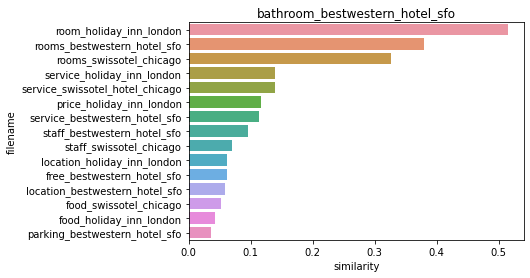

In [34]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# argsort()를 이용하여 앞예제의 첫번째 문서와 타 문서간 유사도가 큰 순으로 정렬한 인덱스 반환하되 자기 자신은 제외. 
sorted_index = similarity_pair.argsort()[:,::-1]
sorted_index = sorted_index[:, 1:]

# 유사도가 큰 순으로 hotel_indexes를 추출하여 재 정렬. 
hotel_sorted_indexes = hotel_indexes[sorted_index.reshape(-1)]

# 유사도가 큰 순으로 유사도 값을 재정렬하되 자기 자신은 제외
hotel_1_sim_value = np.sort(similarity_pair.reshape(-1))[::-1]
hotel_1_sim_value = hotel_1_sim_value[1:]

# 유사도가 큰 순으로 정렬된 Index와 유사도값을 이용하여 파일명과 유사도값을 Seaborn 막대 그래프로 시각화
hotel_1_sim_df = pd.DataFrame()
hotel_1_sim_df['filename'] = document_df.iloc[hotel_sorted_indexes]['filename']
hotel_1_sim_df['similarity'] = hotel_1_sim_value

sns.barplot(x='similarity', y='filename',data=hotel_1_sim_df)
plt.title(comparison_docname)

## 09 한글 텍스트 처리 - 네이버 영화 평점 감정 분석

In [1]:
import pandas as pd

train_df = pd.read_csv('ratings_train.txt', sep='\t')
train_df.head(3)

id                           document  label
0   9976970                아 더빙.. 진짜 짜증나네요 목소리      0
1   3819312  흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나      1
2  10265843                  너무재밓었다그래서보는것을추천한다      0

In [2]:
train_df['label'].value_counts( )

0    75173
1    74827
Name: label, dtype: int64

In [3]:
import re

train_df = train_df.fillna(' ')
# 정규 표현식을 이용하여 숫자를 공백으로 변경(정규 표현식으로 \d 는 숫자를 의미함.) 
train_df['document'] = train_df['document'].apply( lambda x : re.sub(r"\d+", " ", x) )

# 테스트 데이터 셋을 로딩하고 동일하게 Null 및 숫자를 공백으로 변환
test_df = pd.read_csv('ratings_test.txt', sep='\t')
test_df = test_df.fillna(' ')
test_df['document'] = test_df['document'].apply( lambda x : re.sub(r"\d+", " ", x) )

# id 칼럼 삭제 수행
train_df.drop('id', axis=1, inplace=True) 
test_df.drop('id', axis=1, inplace=True)

In [5]:
from konlpy.tag import Twitter

twitter = Twitter()
def tw_tokenizer(text):
    # 입력 인자로 들어온 text 를 형태소 단어로 토큰화 하여 list 객체 반환
    tokens_ko = twitter.morphs(text)
    return tokens_ko

C:\Users\lovel\anaconda3\lib\site-packages\konlpy\tag\_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Twitter 객체의 morphs( ) 객체를 이용한 tokenizer를 사용. ngram_range는 (1,2) 
tfidf_vect = TfidfVectorizer(tokenizer=tw_tokenizer, ngram_range=(1,2), min_df=3, max_df=0.9)
tfidf_vect.fit(train_df['document'])
tfidf_matrix_train = tfidf_vect.transform(train_df['document'])

C:\Users\lovel\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [7]:
# Logistic Regression 을 이용하여 감성 분석 Classification 수행. 
lg_clf = LogisticRegression(random_state=0)

# Parameter C 최적화를 위해 GridSearchCV 를 이용. 
params = { 'C': [1 ,3.5, 4.5, 5.5, 10 ] }
grid_cv = GridSearchCV(lg_clf , param_grid=params , cv=3 ,scoring='accuracy', verbose=1 )
grid_cv.fit(tfidf_matrix_train , train_df['label'] )
print(grid_cv.best_params_ , round(grid_cv.best_score_,4))

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\lovel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lovel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:

{'C': 3.5} 0.8592


C:\Users\lovel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
from sklearn.metrics import accuracy_score

# 학습 데이터를 적용한 TfidfVectorizer를 이용하여 테스트 데이터를 TF-IDF 값으로 Feature 변환함. 
tfidf_matrix_test = tfidf_vect.transform(test_df['document'])

# classifier 는 GridSearchCV에서 최적 파라미터로 학습된 classifier를 그대로 이용
best_estimator = grid_cv.best_estimator_
preds = best_estimator.predict(tfidf_matrix_test)

print('Logistic Regression 정확도: ',accuracy_score(test_df['label'],preds))

Logistic Regression 정확도:  0.86188
